# 학습


In [ ]:
# 데이터 읽기


from IPython.display import Image
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

#caltech_dir = "./multi_img_data/imgs_others/train"
caltech_dir = "/content/drive/MyDrive/hairloss_image/boundingbox/agumentation"
categories = ["m0", "m1", "m2",]
nb_classes = len(categories)

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    image_dir = caltech_dir + "/" + cat
    #files = glob.glob(image_dir+"/*.PNG")
    files = glob.glob(image_dir+"/*.jpg") # 확장자 주의
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        #img= img.convert('L')   #흑백변환
        img = img.convert("RGB") #컬러변환
        img = img.resize((image_w, image_h))
        #display(img)

        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)
#1 0 0 0 이면 airplanes
#0 1 0 0 이면 buddha 이런식


#X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)
xy = (X_train, X_test, y_train, y_test)
np.save("/content/drive/MyDrive/hairloss_image_data.npy", xy)

print("ok", len(y))

In [ ]:
# pca 처리
#hair_iamge = np.load('/content/drive/MyDrive/hairloss_image_data.npy', allow_pickle=True)
hair_iamge = X
#print(hair_iamge.shape)
hair_iamge_2d = hair_iamge.reshape(-1, image_w*image_h*3) #  컬러일 경우
#hair_iamge_2d = hair_iamge.reshape(-1, image_w*image_h) #  흑백일 경우

In [ ]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
#import keras.backend.tensorflow_backend as K
#K = tf.keras.backend


import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

X_train, X_test, y_train, y_test = np.load('/content/drive/MyDrive/hairloss_image_data.npy',allow_pickle=True)
print(X_train.shape)
print(X_train.shape[0])

(1200, 64, 64, 3)
1200


In [ ]:
categories = ["m0", "m1", "m2",]
nb_classes = len(categories)

#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [ ]:
#with K.tf_ops.device('/device:GPU:0'):
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dir = './model'

if not os.path.exists(model_dir):
    os.mkdir(model_dir)

model_path = model_dir + '/multi_img_classification.model'
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [ ]:
X_train.shape[1:]

(64, 64, 3)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [ ]:
#history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

Epoch 1/50
38/38 [==============================] - ETA: 0s - loss: 1.1548 - accuracy: 0.4483
Epoch 1: val_loss improved from inf to 0.91835, saving model to ./model/multi_img_classification.model
INFO:tensorflow:Assets written to: ./model/multi_img_classification.model/assets
38/38 [==============================] - 11s 279ms/step - loss: 1.1548 - accuracy: 0.4483 - val_loss: 0.9183 - val_accuracy: 0.6533
Epoch 2/50
38/38 [==============================] - ETA: 0s - loss: 0.7649 - accuracy: 0.6617
Epoch 2: val_loss improved from 0.91835 to 0.62366, saving model to ./model/multi_img_classification.model
INFO:tensorflow:Assets written to: ./model/multi_img_classification.model/assets
38/38 [==============================] - 10s 270ms/step - loss: 0.7649 - accuracy: 0.6617 - val_loss: 0.6237 - val_accuracy: 0.7367
Epoch 3/50
38/38 [==============================] - ETA: 0s - loss: 0.6467 - accuracy: 0.7158
Epoch 3: val_loss improved from 0.62366 to 0.57501, saving model to ./model/multi_

In [ ]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

10/10 [==============================] - 1s 51ms/step - loss: 0.2699 - accuracy: 0.9167
정확도 : 0.9167


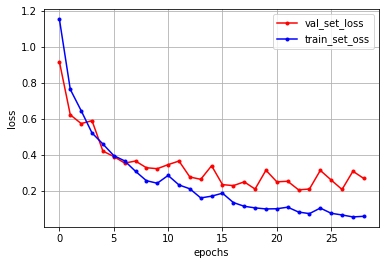

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [ ]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "/content/drive/MyDrive/hairloss_image/boundingbox/agumentation"
image_w = 64
image_h = 64

pixels = image_h * image_w * 3

image_dir = caltech_dir + "/" + cat
files = glob.glob(image_dir+"/*.jpg")

X = []
filenames = []
#files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
#print(X)
#print(type(filenames)

KeyboardInterrupt: ignored

In [ ]:
# #print(filenames[0])
# print(filenames[0].split("/")[5])